In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import matplotlib.ticker as plticker
import time
from mpl_toolkits.axes_grid1 import make_axes_locatable
from tqdm import tqdm
from collections import defaultdict
from typing import Optional
from scipy.integrate import solve_ivp
from scipy.fftpack import diff as psdiff
import torch

import os, sys
sys.path.append(os.path.join(os.getcwd(), '../sympde'))

from misc.utils import save_obj
from data.solve import SolvePDE
from data.pdes import PDEs

from misc.utils import load_obj

from viz.plot_pde_data import plot_1d_dict, plot_1ds

from generate_data import parse_options


In [3]:
pdes = PDEs()

In [4]:
# Tmax_dict = {
#     'Pde1'  : 100,
#     'Pde2'  : 100,
#     'Pde3'  : 100,
#     'Pde4'  : 100,
#     'Pde5'  : 100,
#     'Pde6'  : 200,
#     'Pde7'  : 200,
#     'Pde8'  : 2,
#     'Pde9'  : 2,
#     'Pde10' : 2,
#     'Pde11' : 2,
#     'Pde12' : 2,
#     'Pde13' : 2,
#     'Pde14' : 2,
#     'Pde15' : 200,
#     'Pde16' : 0.5, 
#     'Pde17' : 0.5,
#     'Pde18' : 2,
#     'Pde19' : 2,
#     'Pde20' : 2,
#     'Pde21' : 2,
#     'Pde22' : 200,
#     'Pde23' : 200,
#     'Pde24' : 200,
#     'KdV'   : 50
# }

Generating test data for Pde16!: 100%|██████████| 1/1 [00:00<00:00, 15.32it/s]


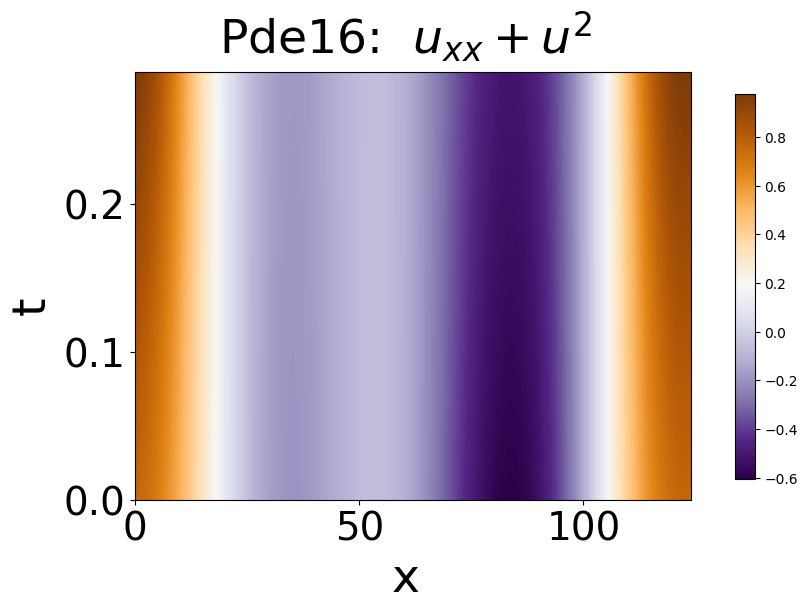

In [10]:
args = parse_options(notebook=True)

args.Lmax = 128
args.Tmax = 0.3
args.Nx = 256
args.Nt = 40

args.tol = 1e-7

args.pde_names = ['Pde16']

pde_name = args.pde_names[0]
N_samples = 1

pde_data = SolvePDE(Lmax=args.Lmax, Tmax=args.Tmax, Nx=args.Nx, Nt=args.Nt, tol=args.tol)
us, dxs, dts = pde_data.generate_data(pdes[pde_name], N_samples = N_samples, tqdm_desc=f"Generating test data for {pde_name}!")

plot_1ds(us, dxs, dts, nrows = 1, ncols = N_samples, title = rf'{pde_name}:  {str(pdes[pde_name])}', figsize = (8,6))


## Load to verify

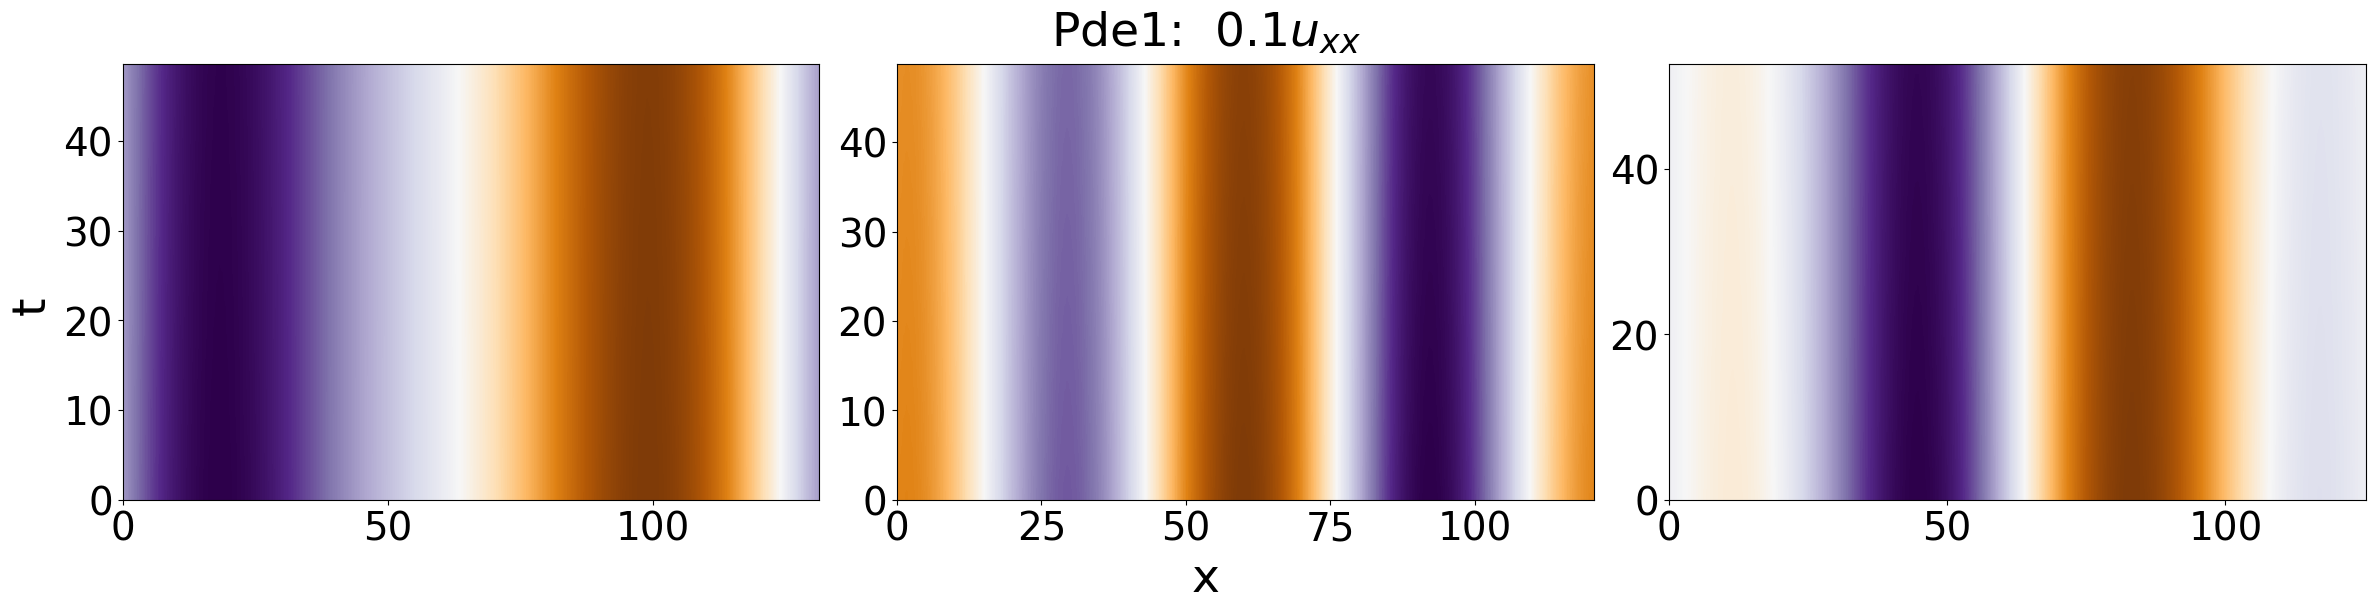

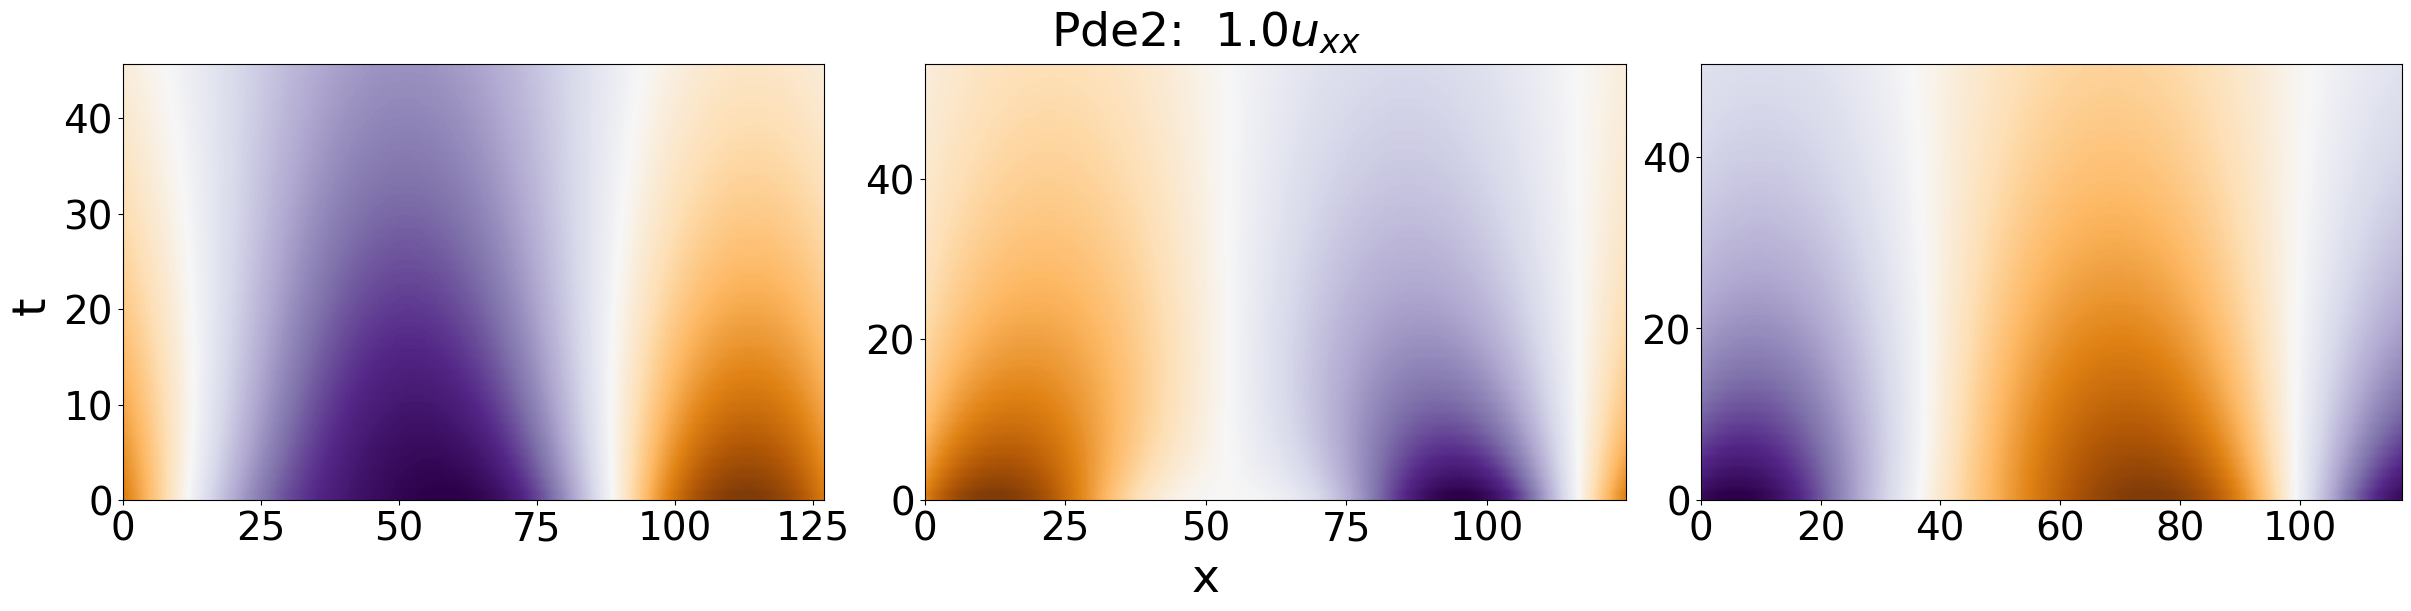

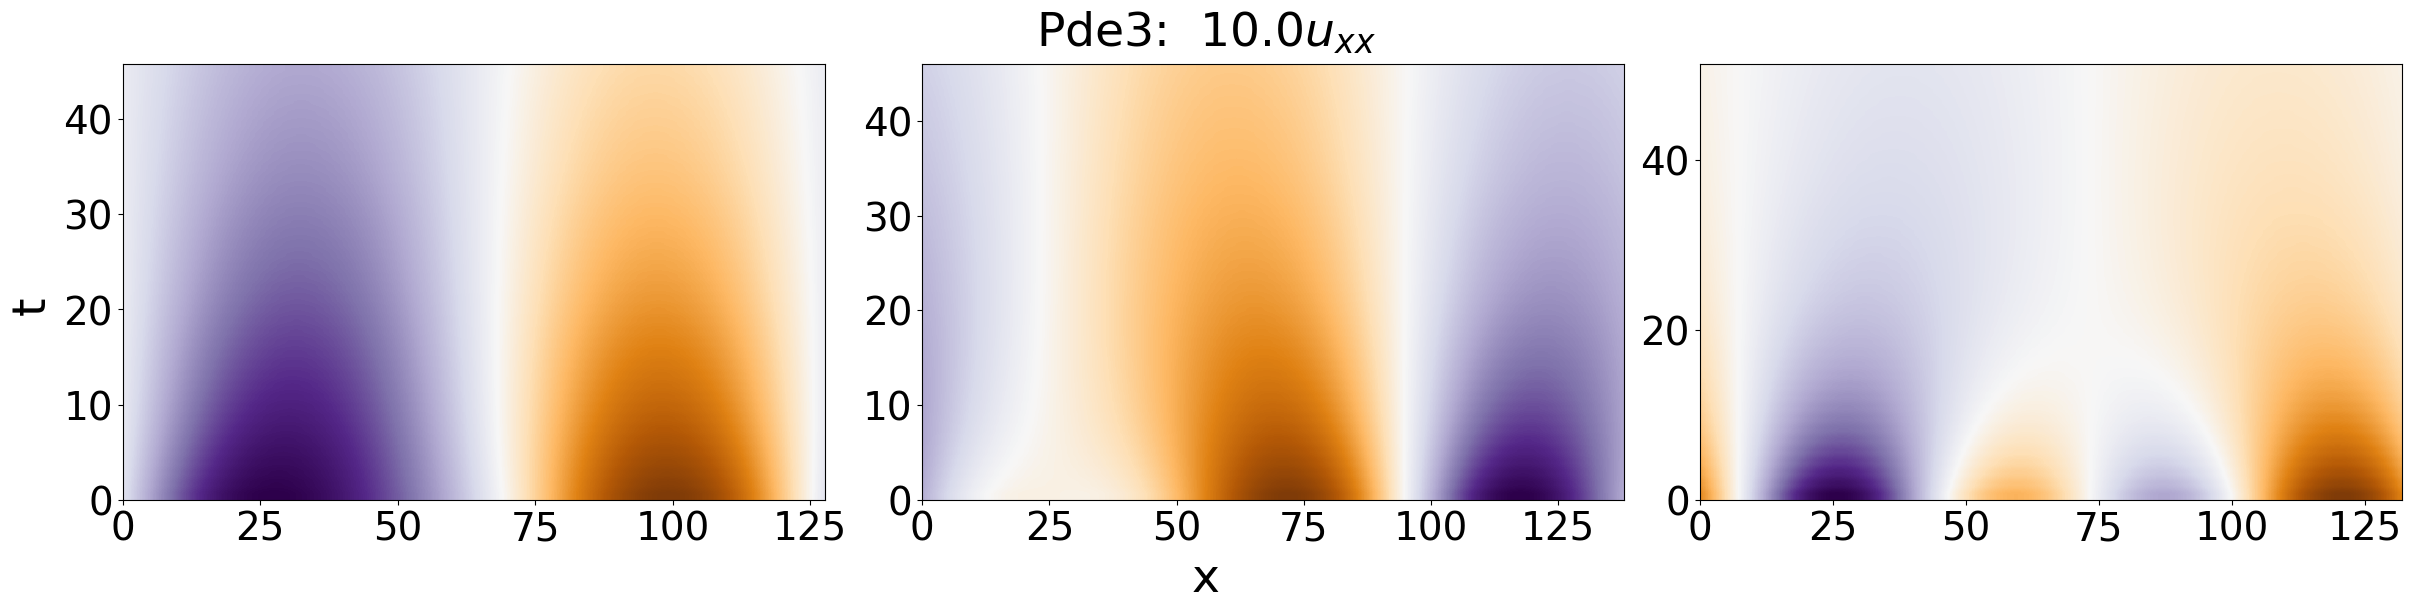

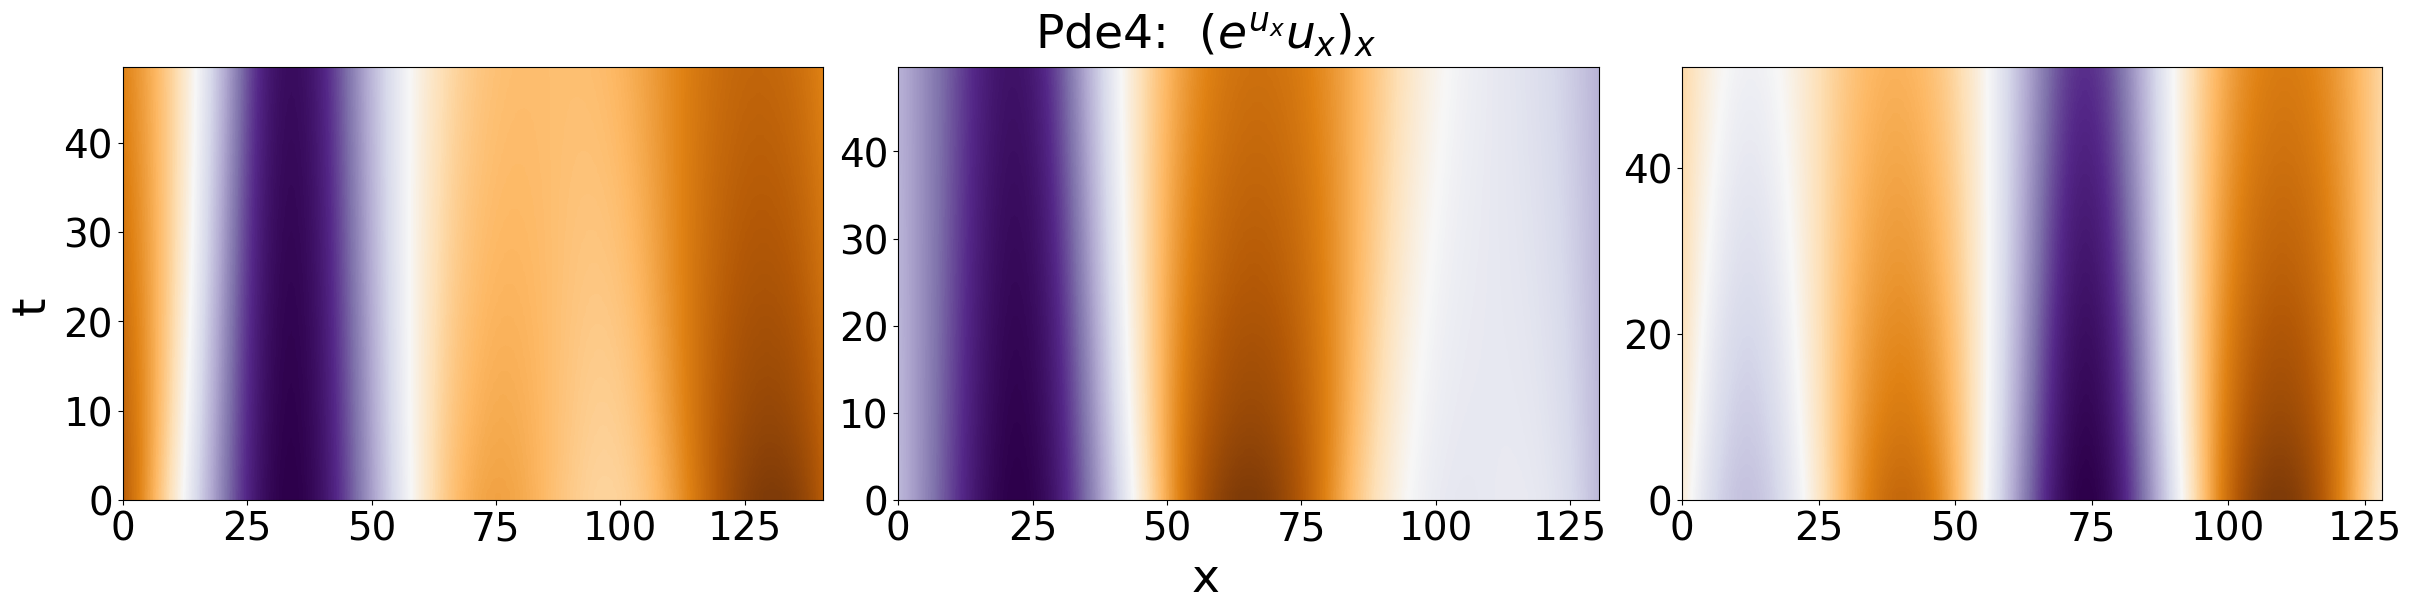

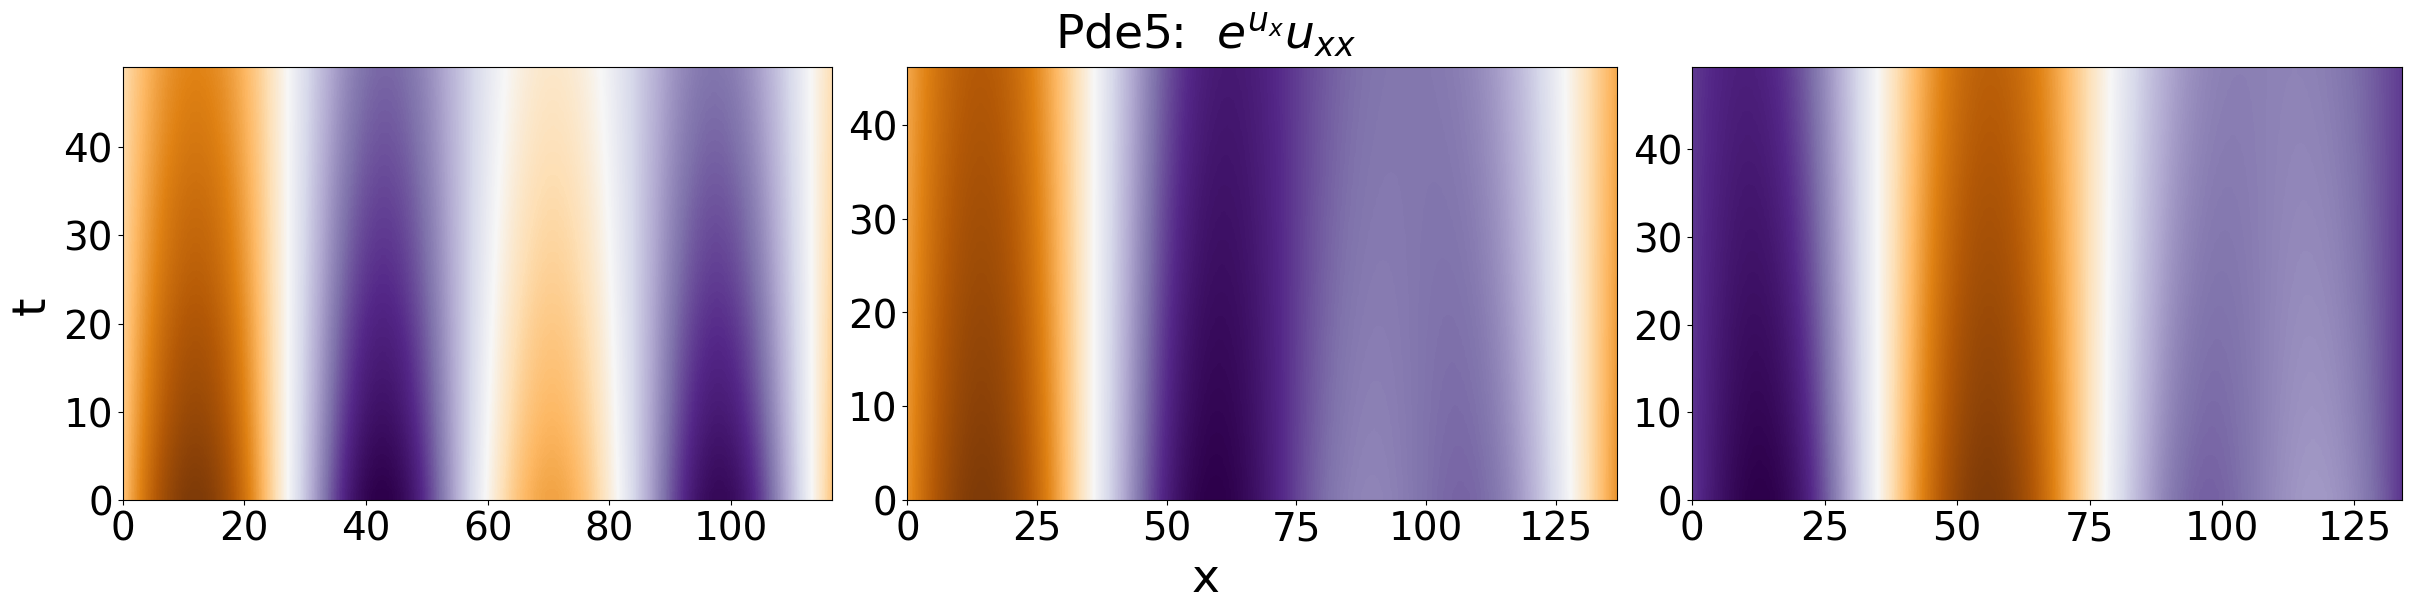

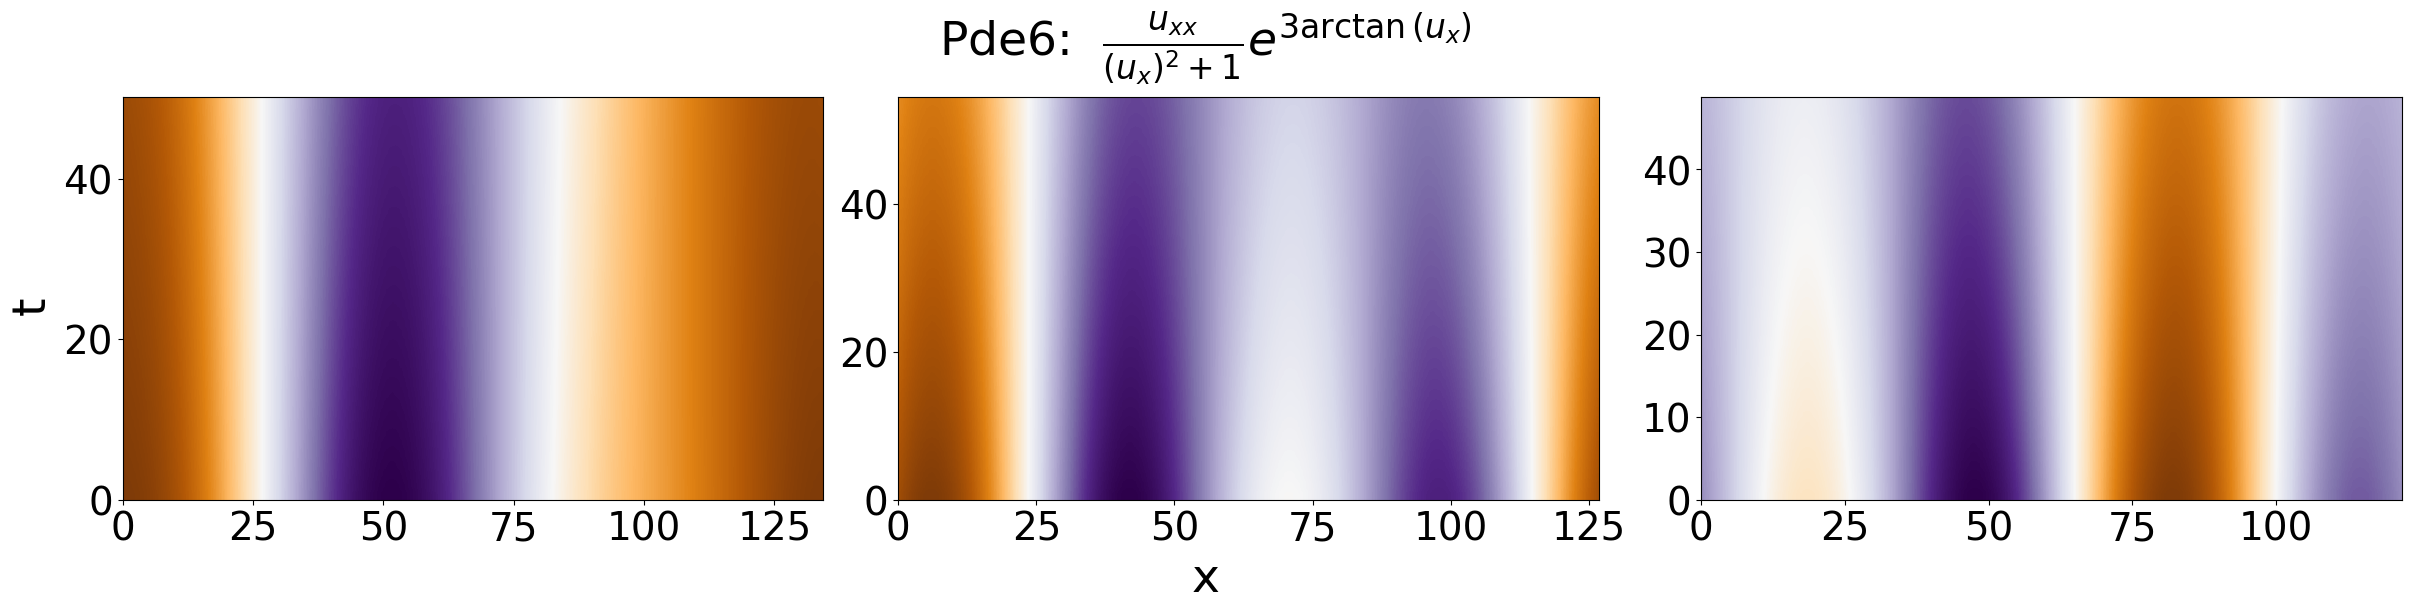

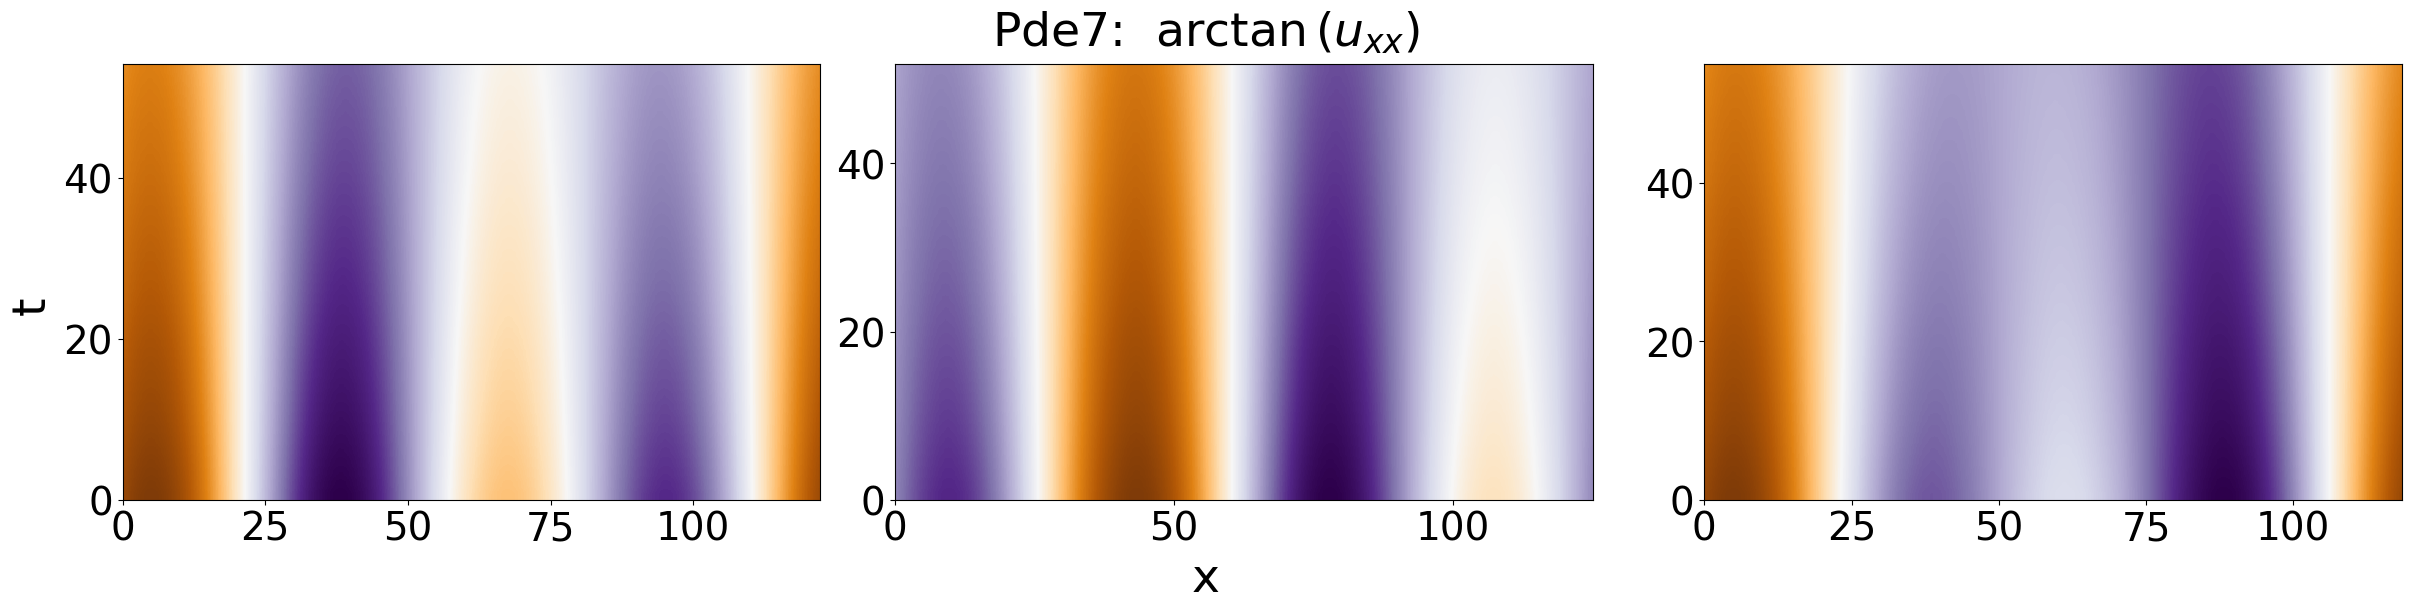

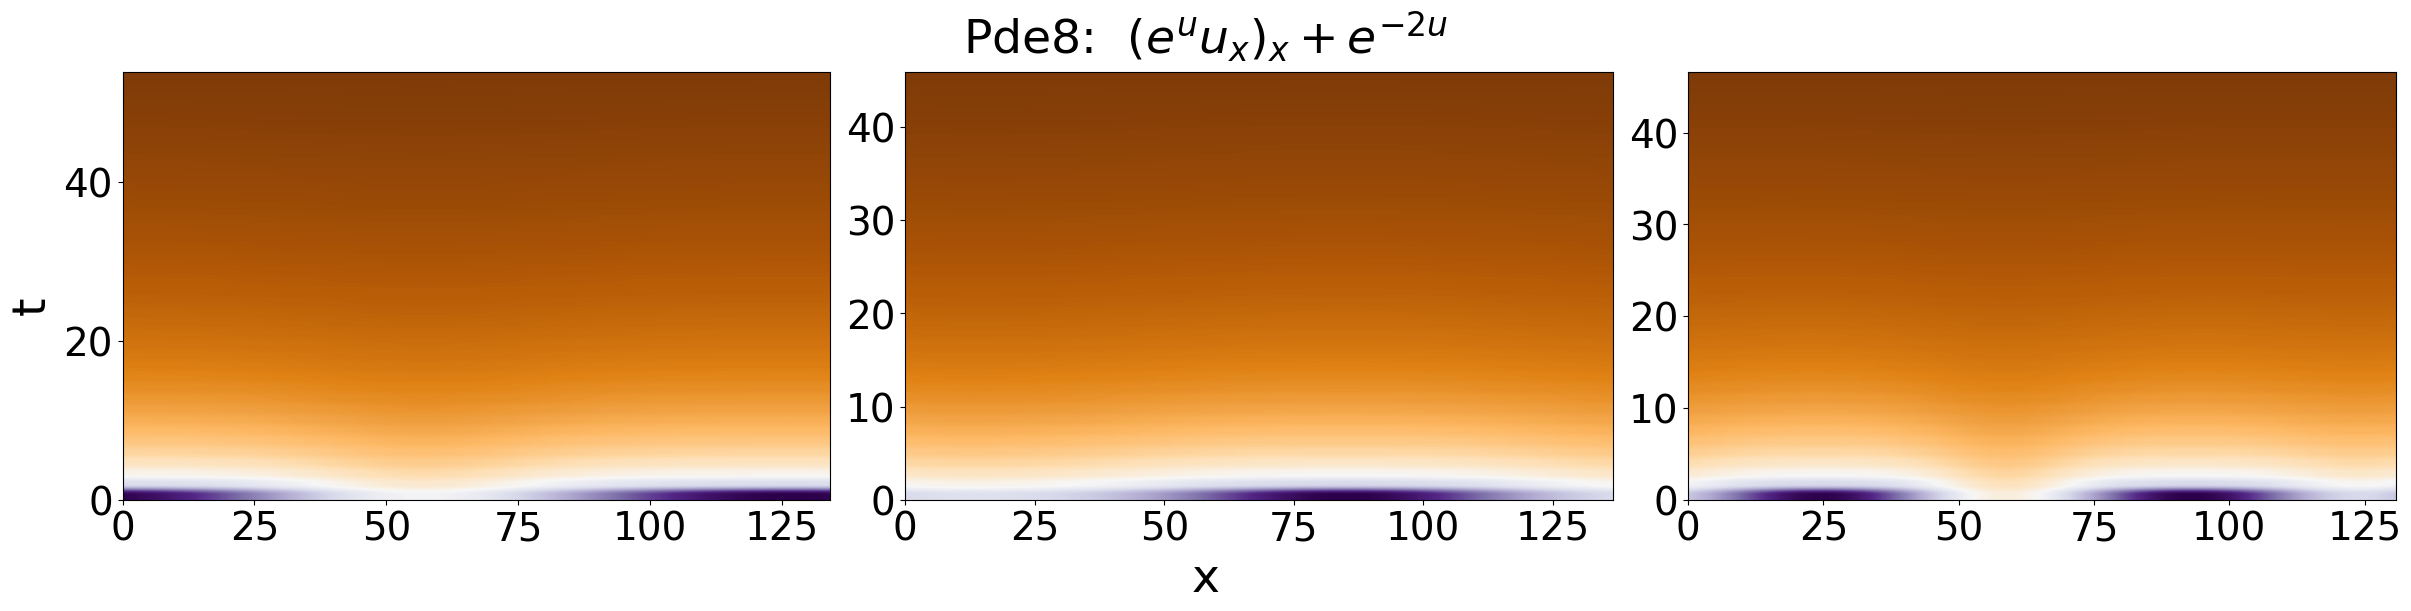

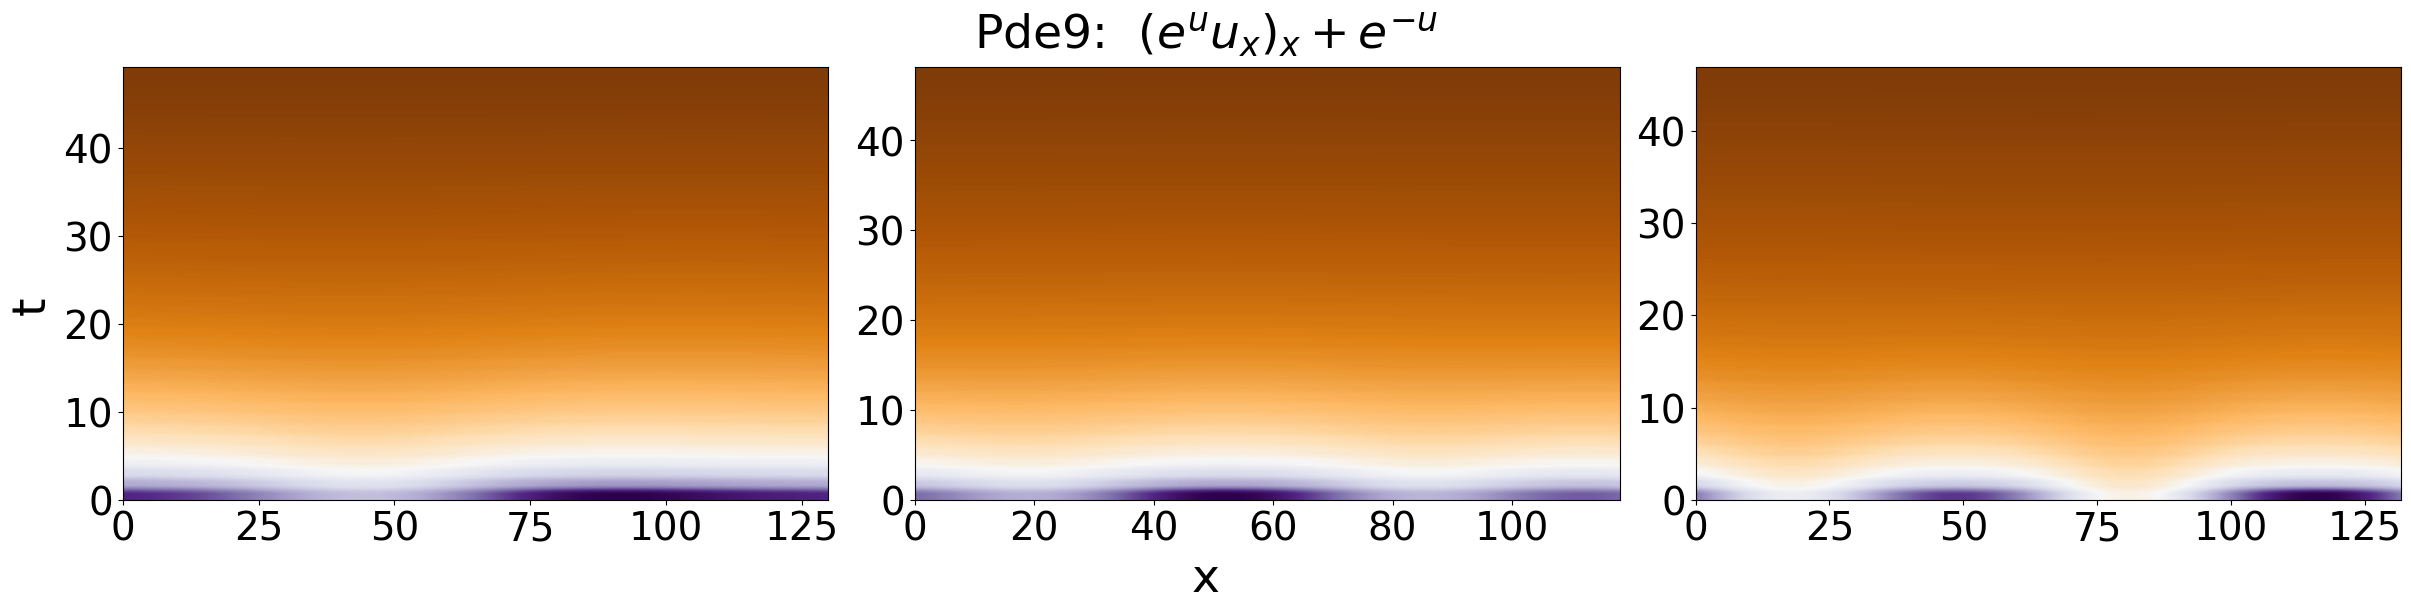

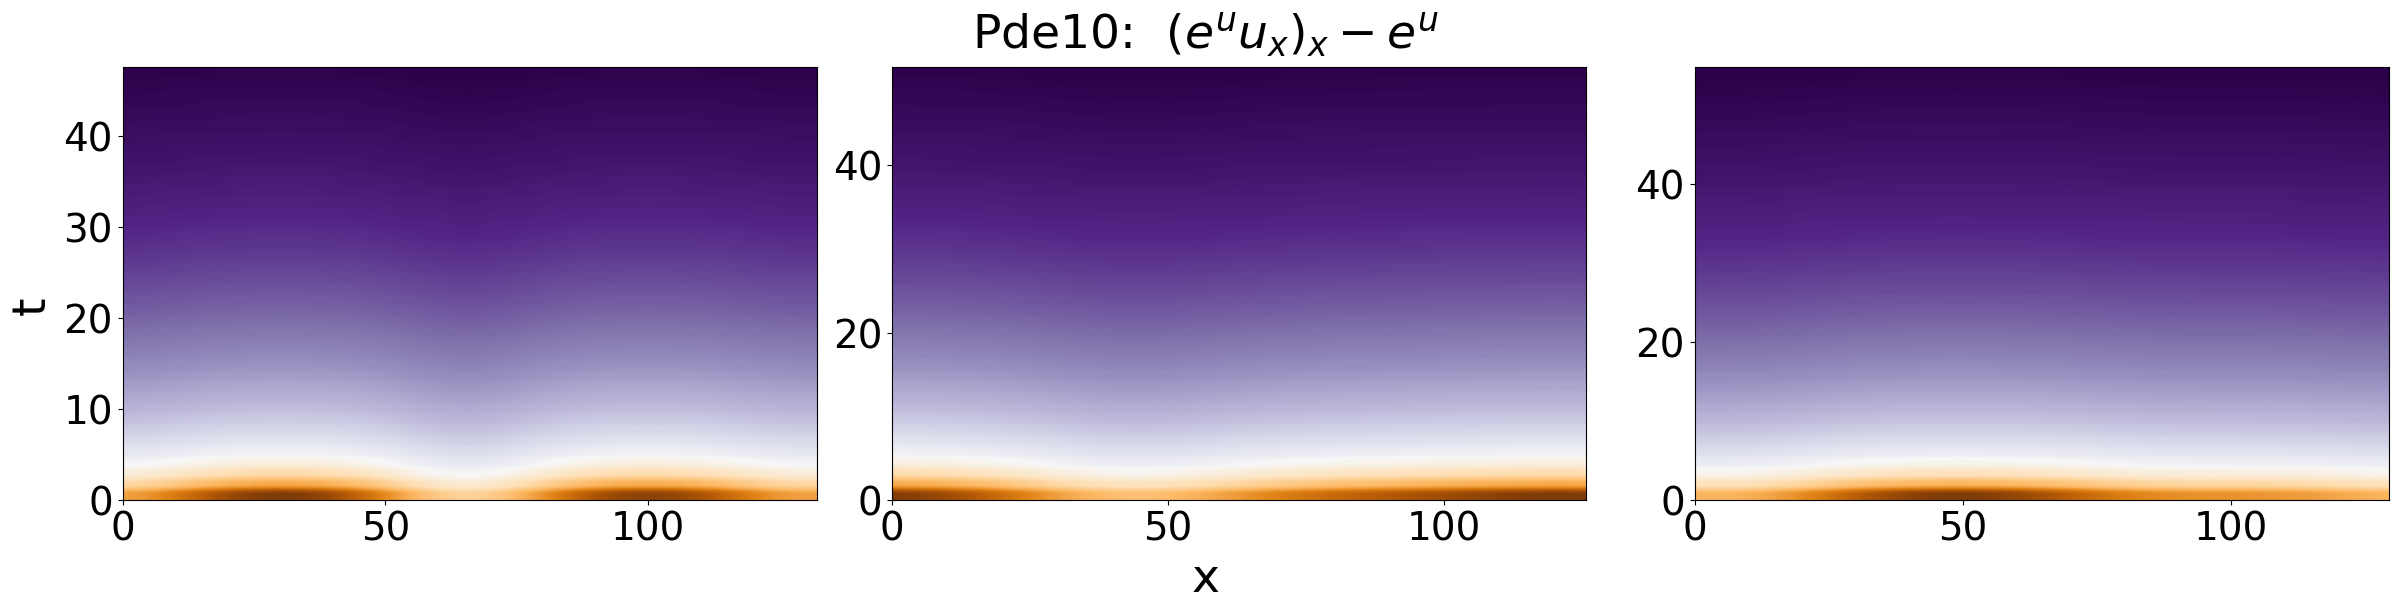

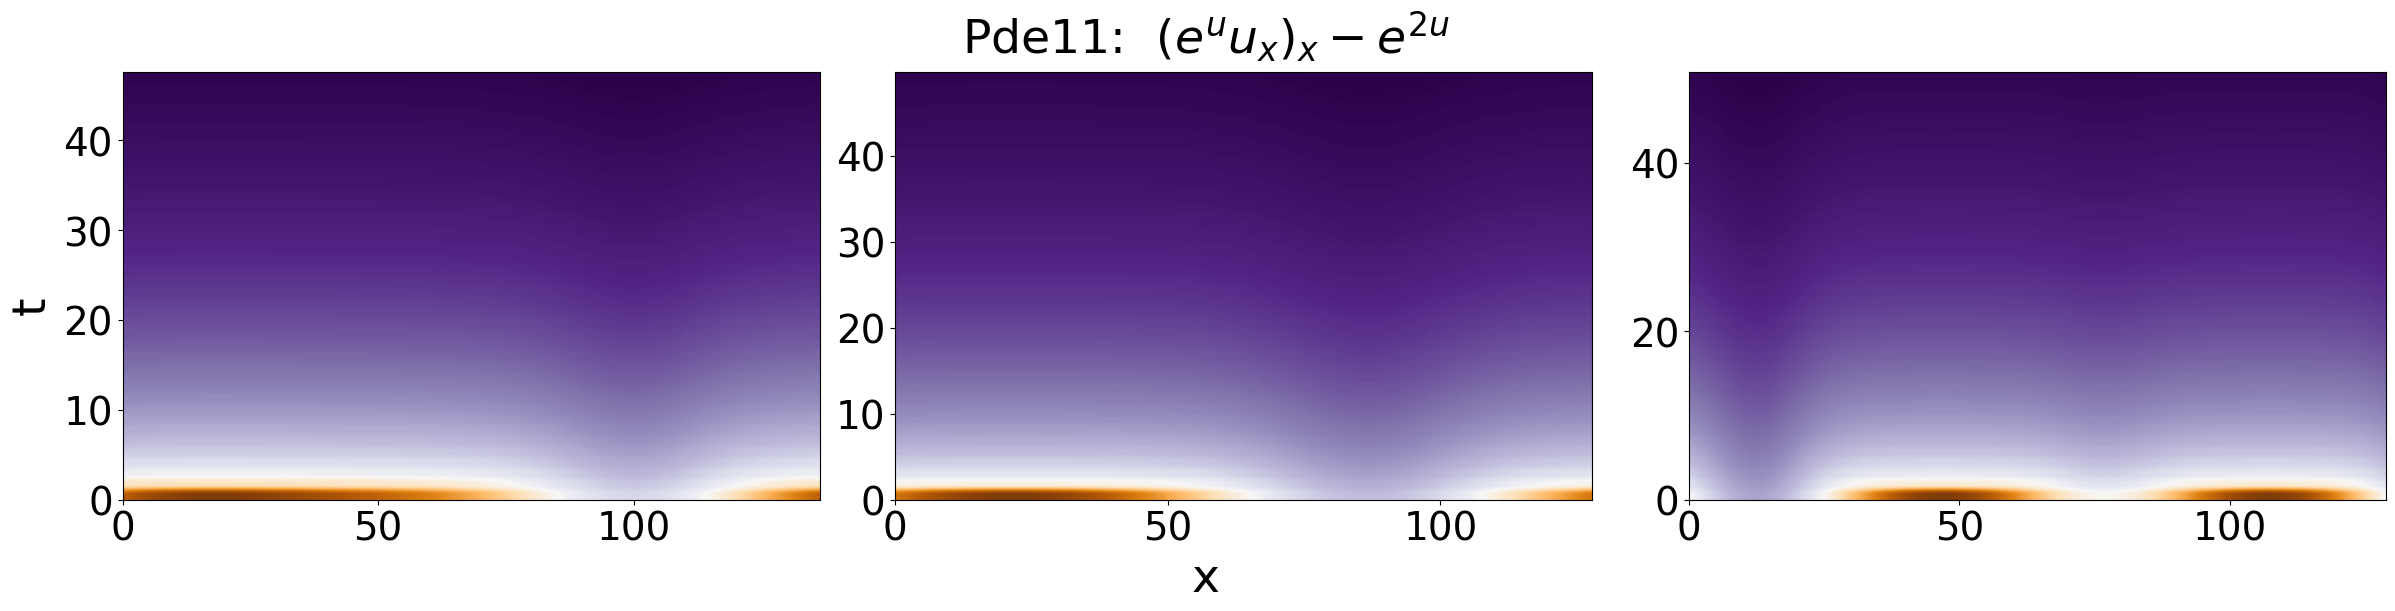

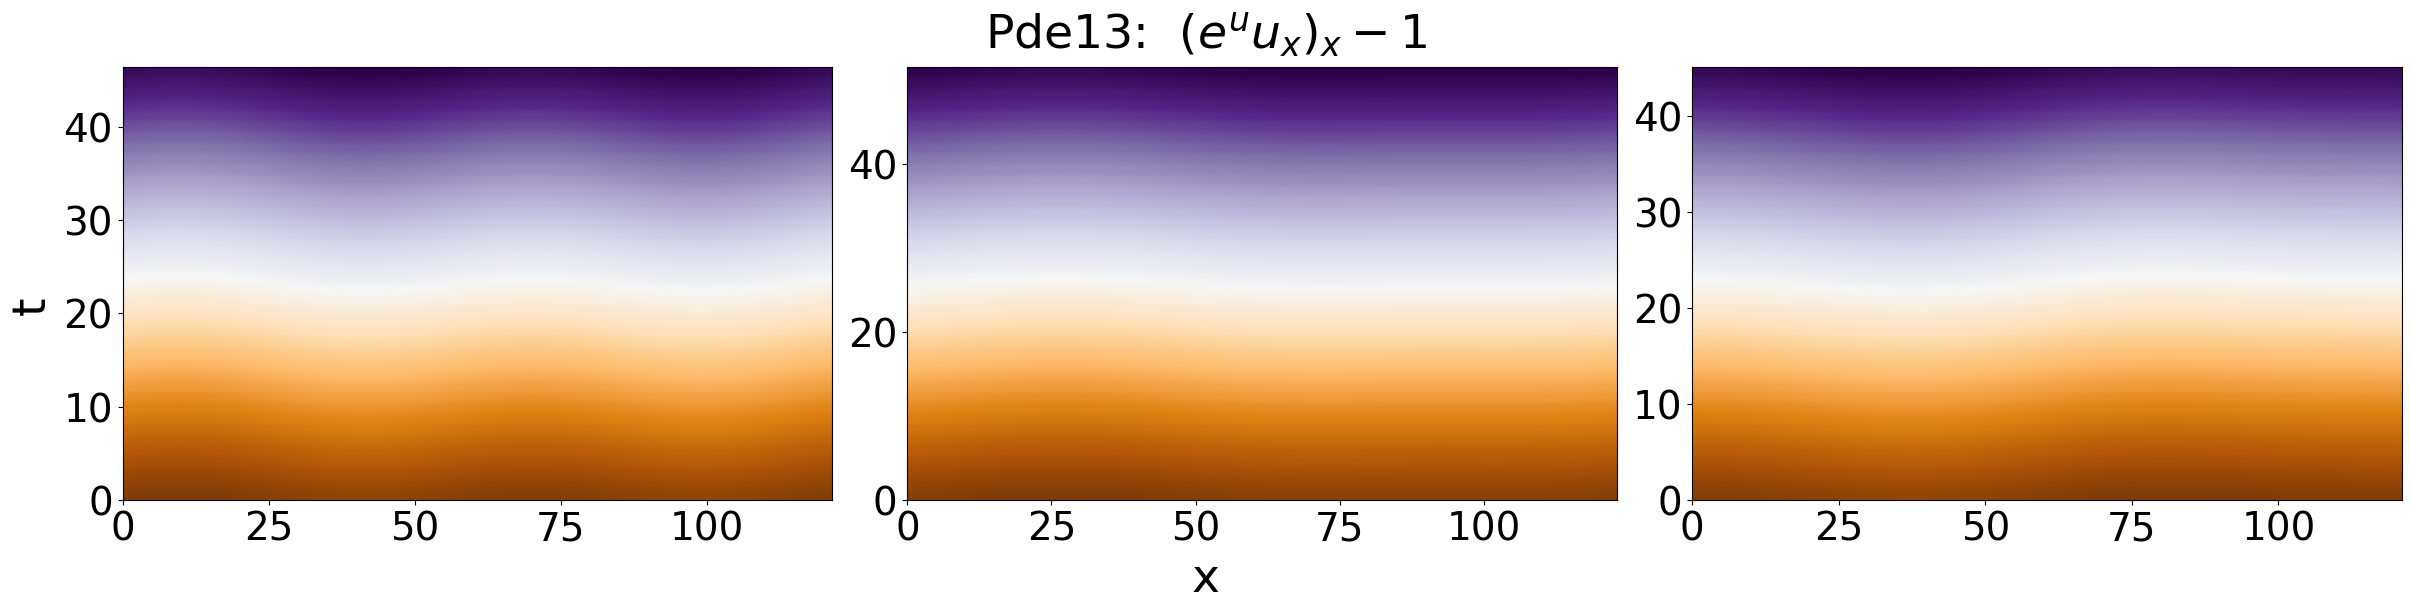

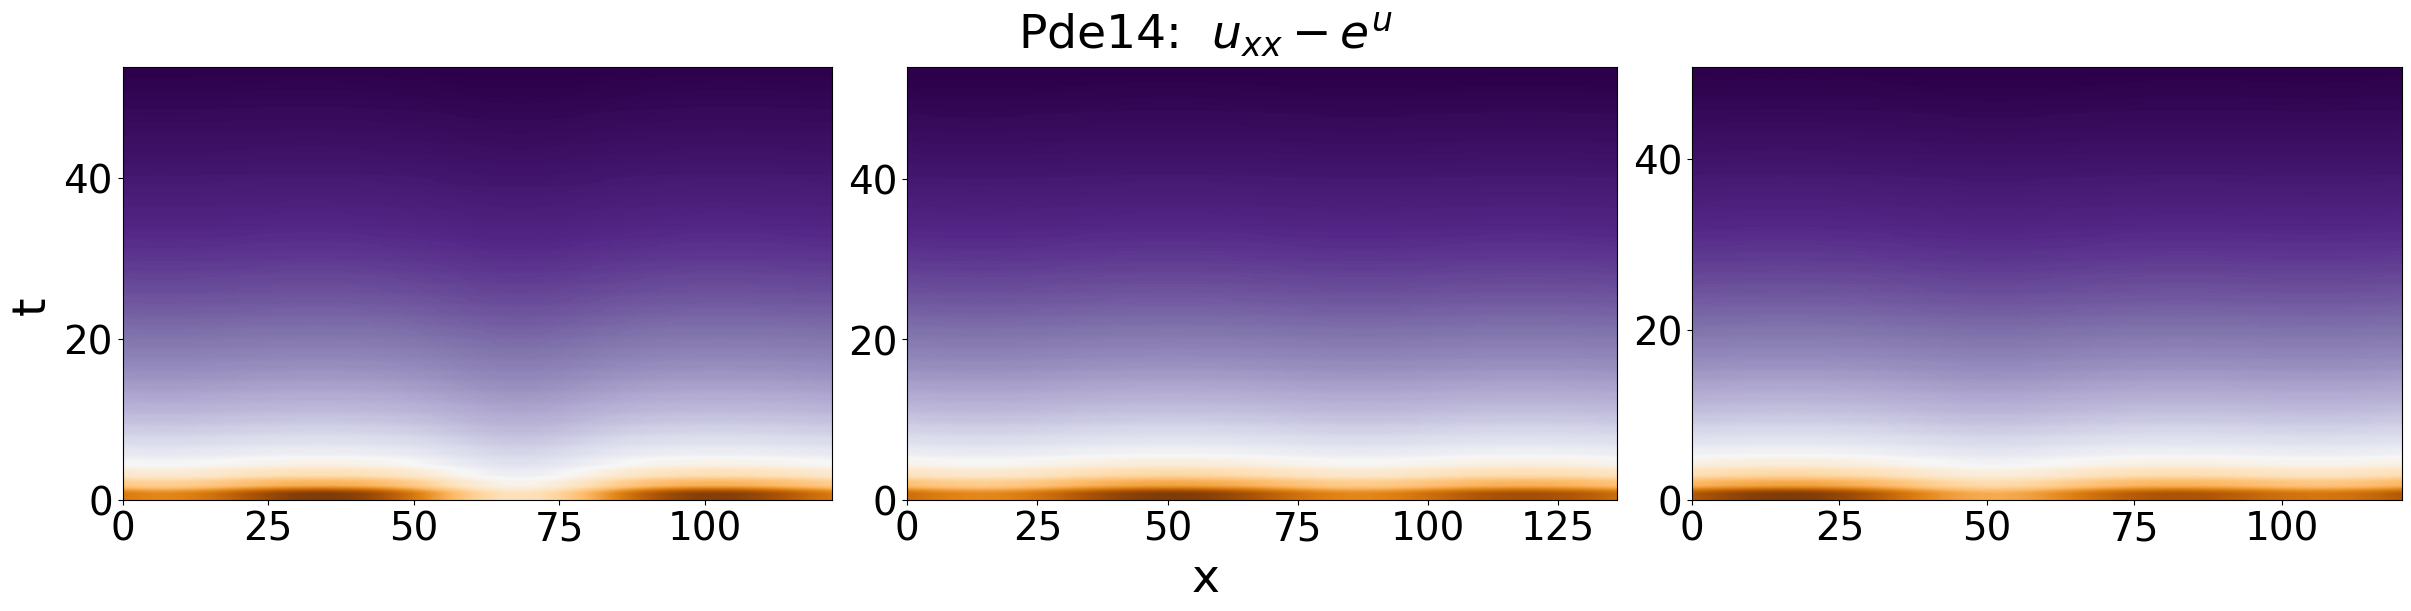

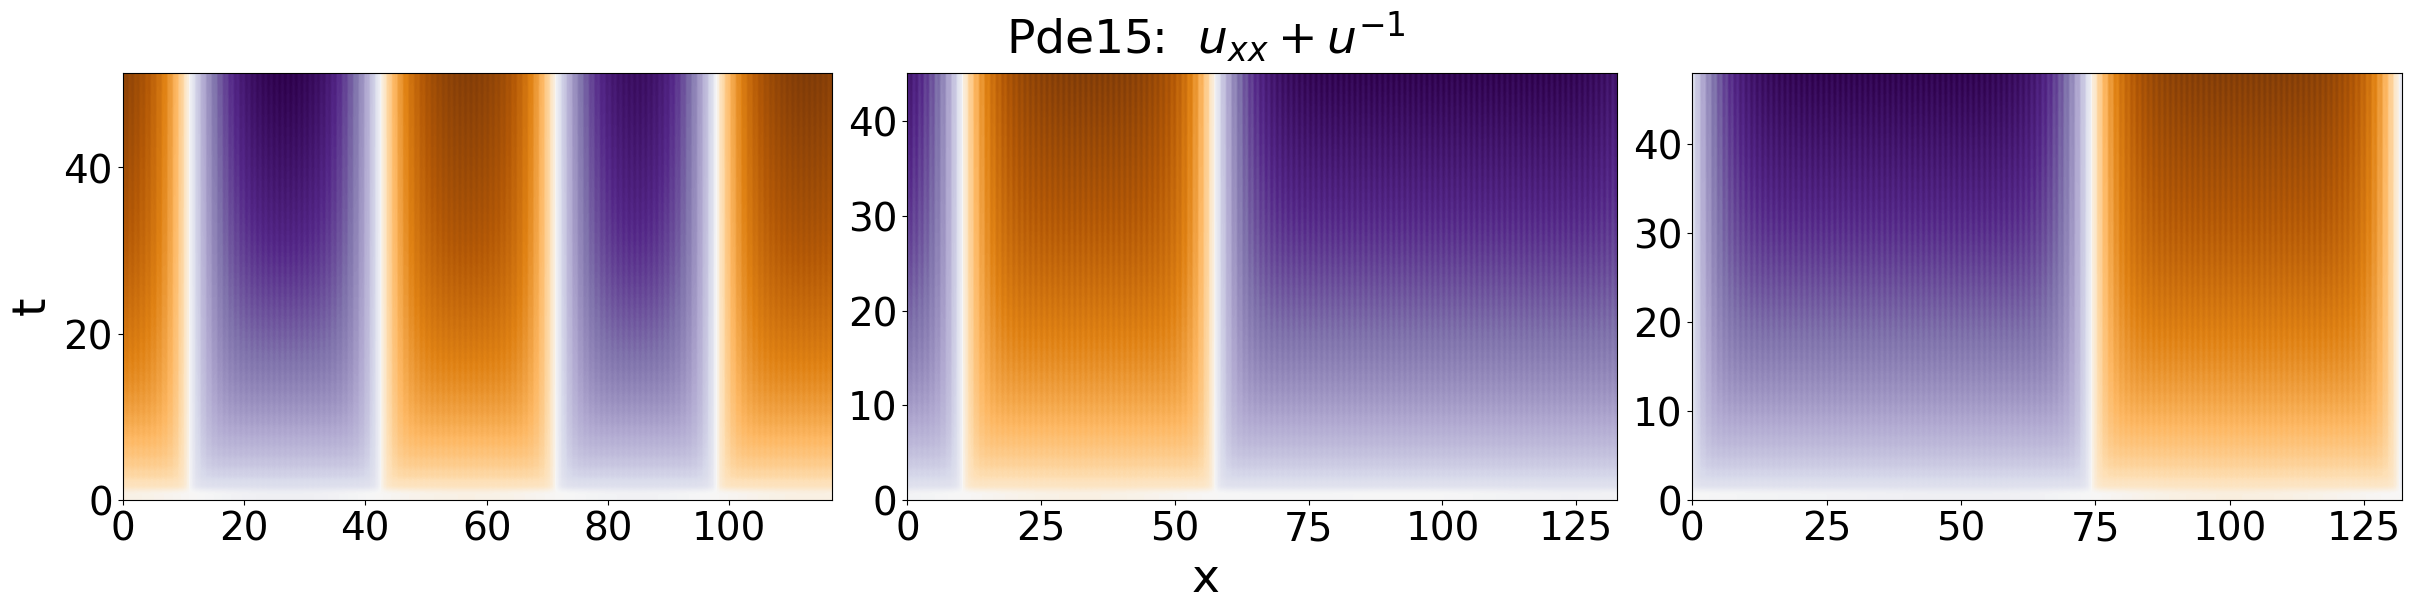

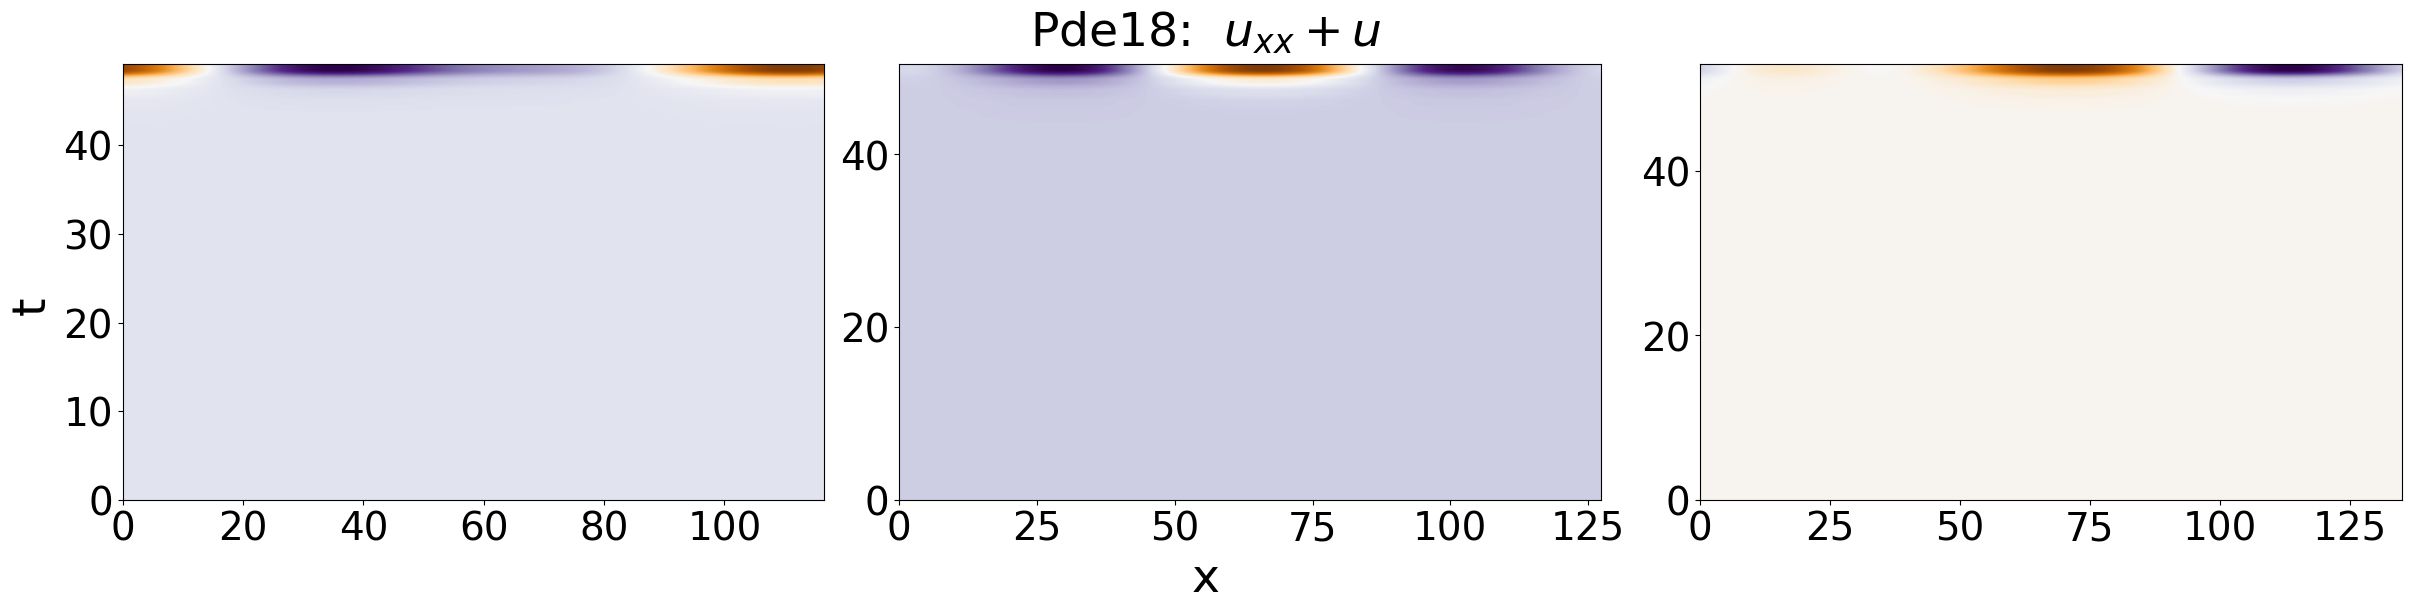

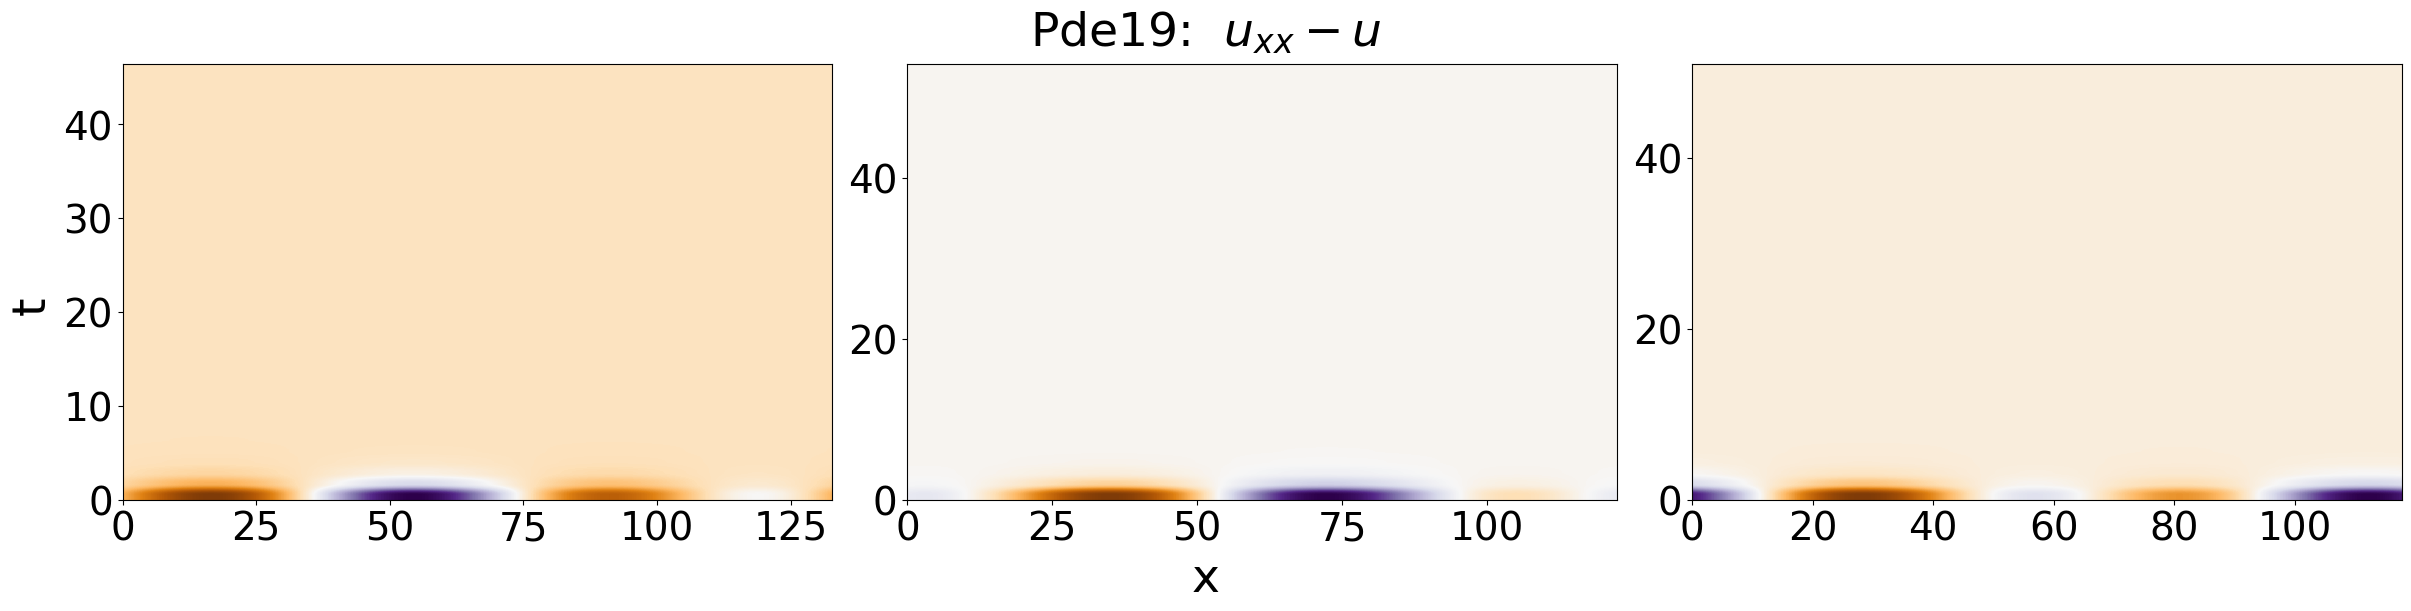

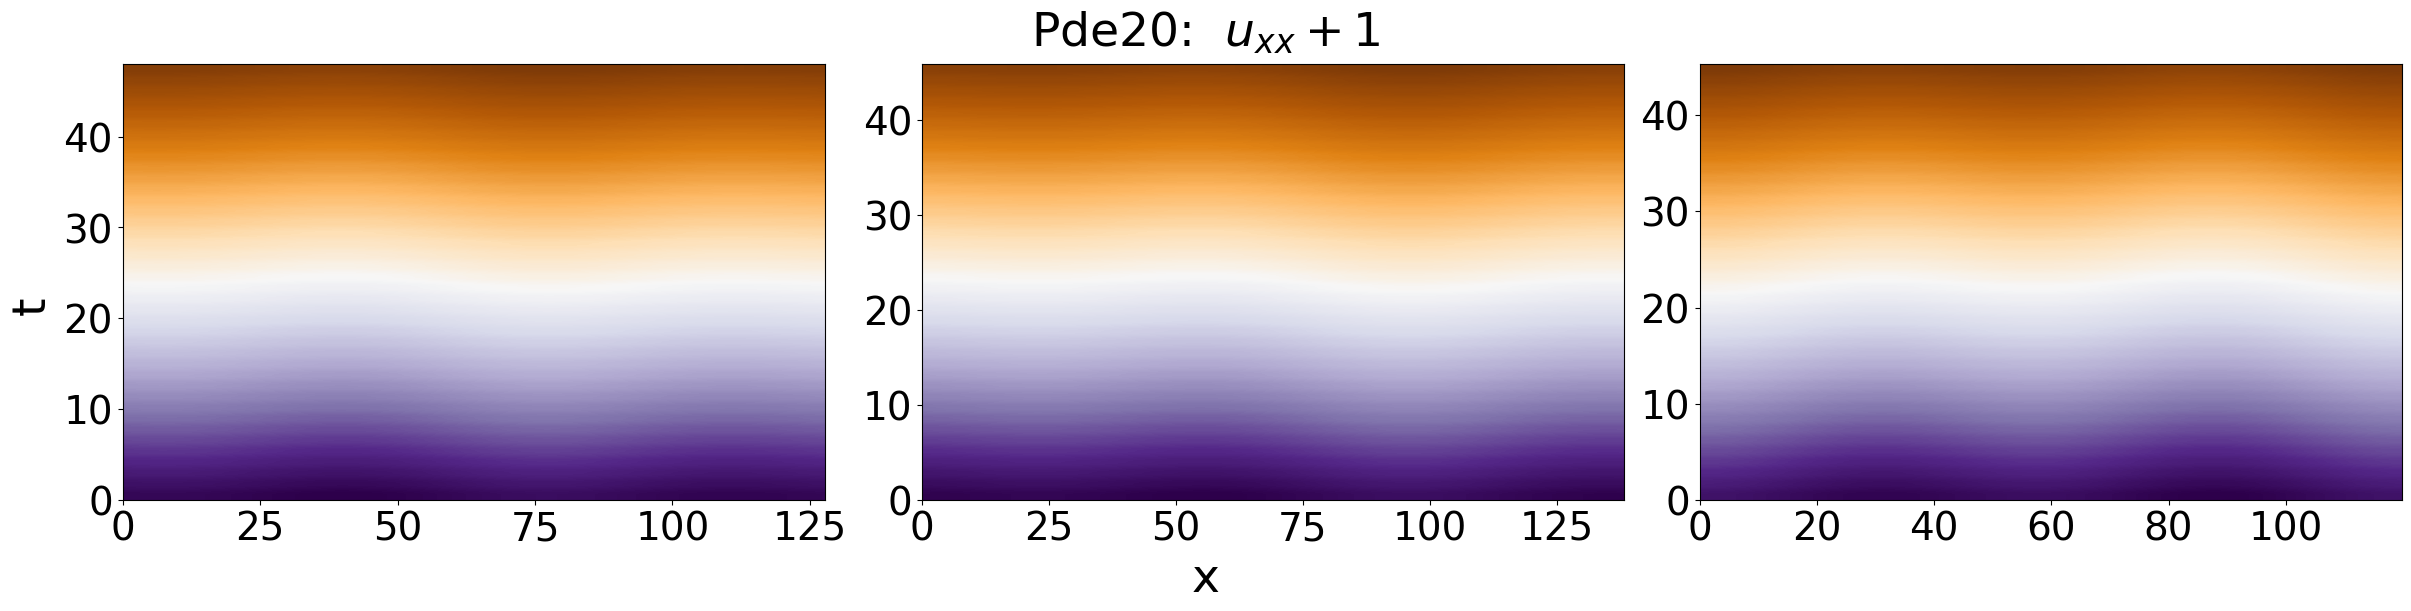

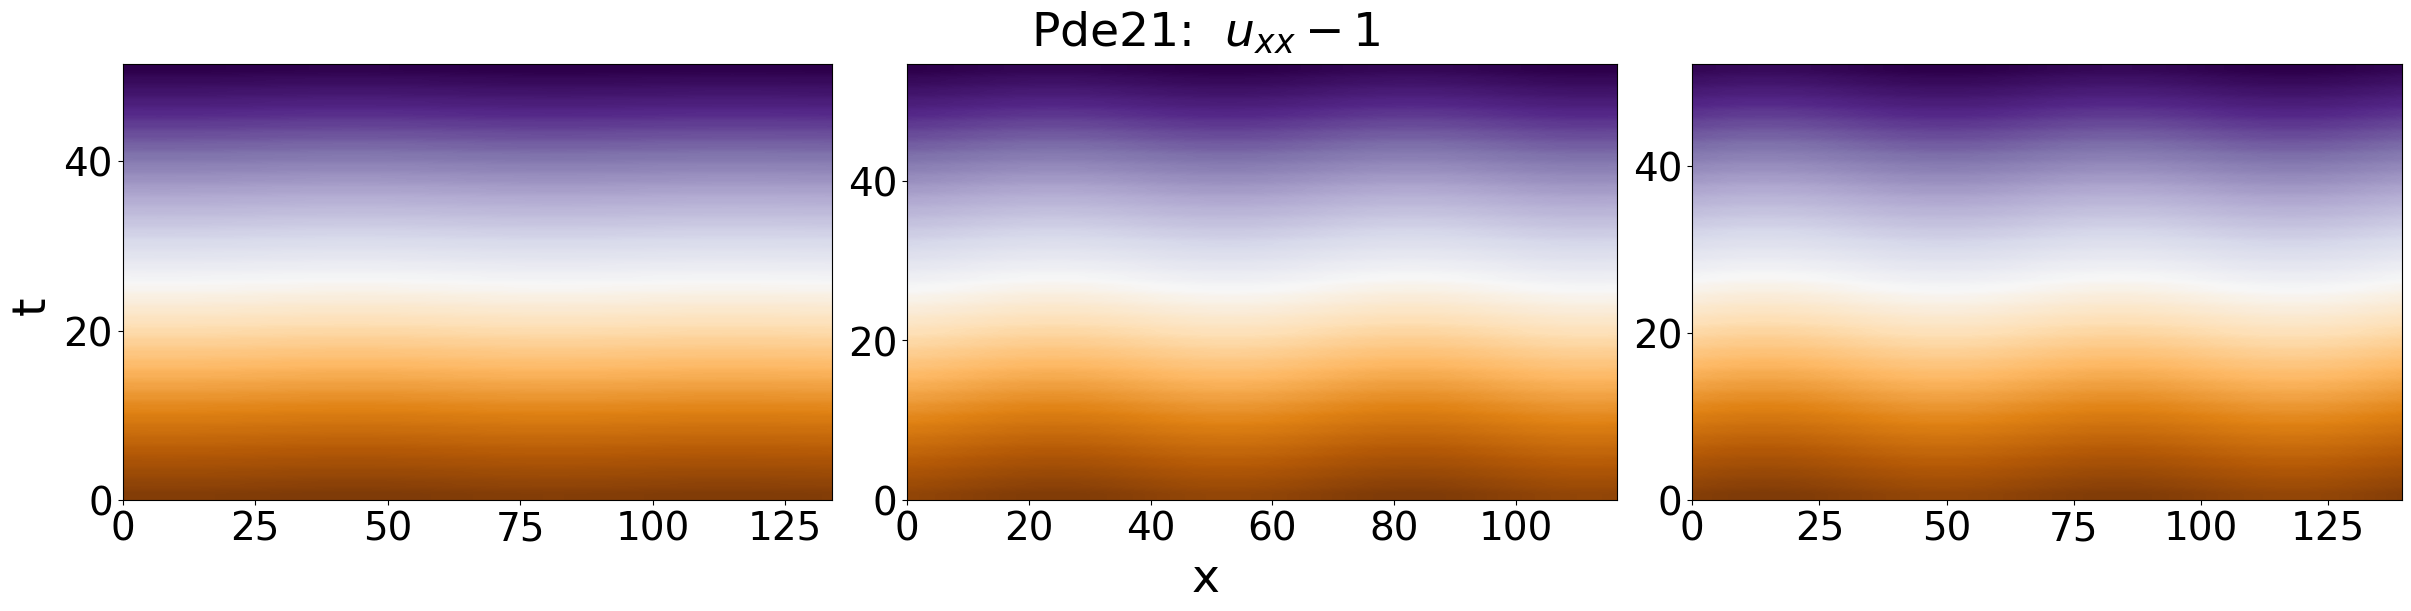

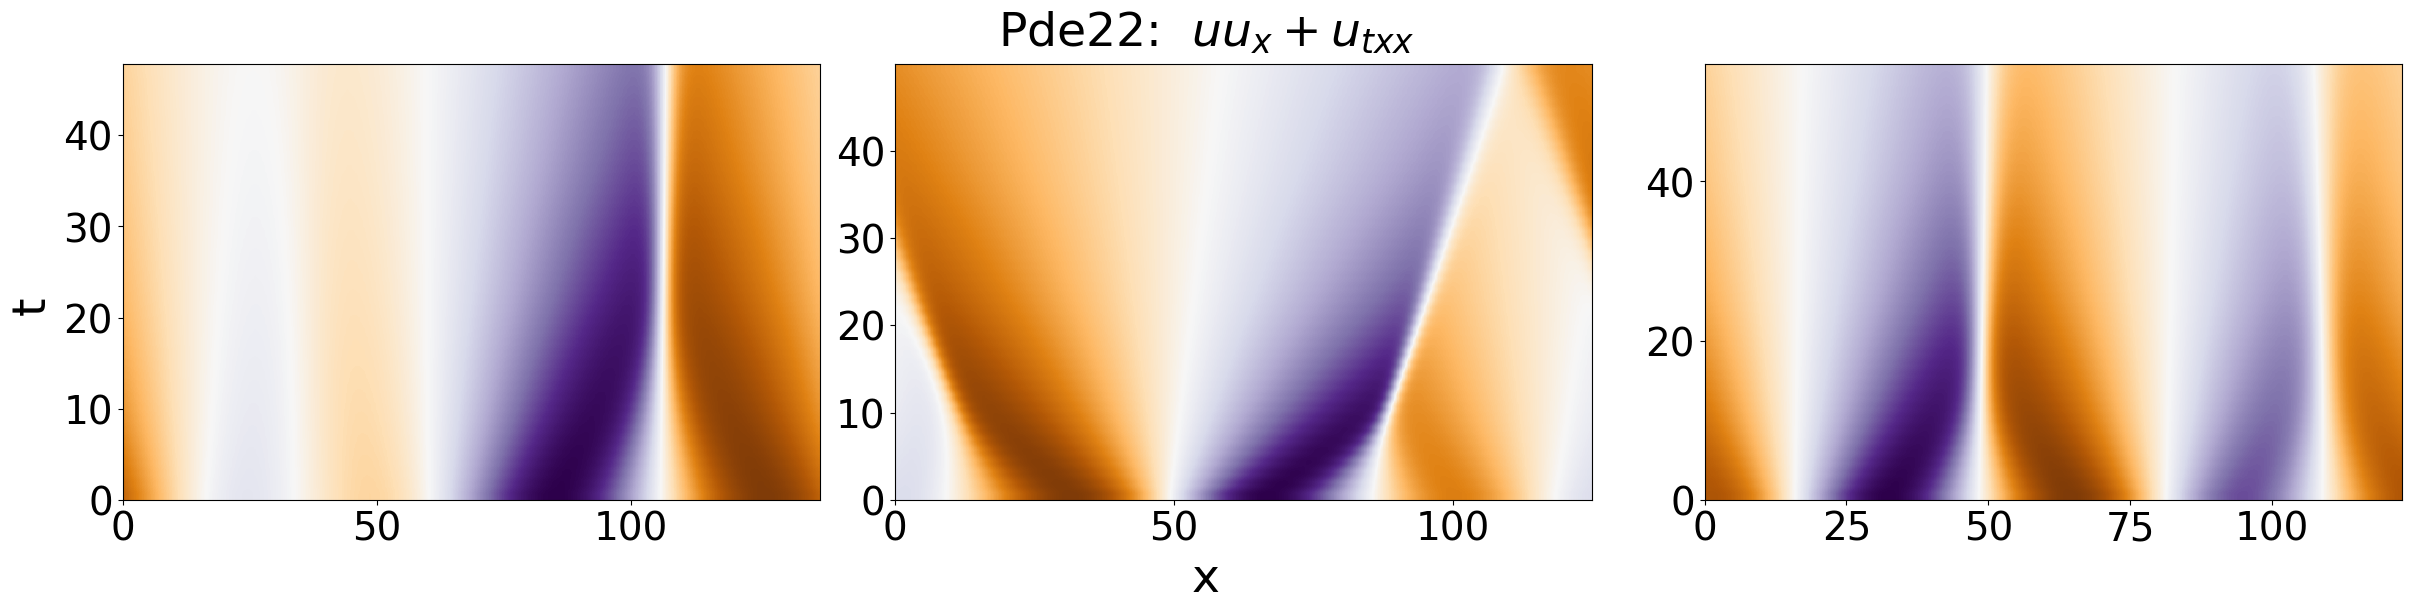

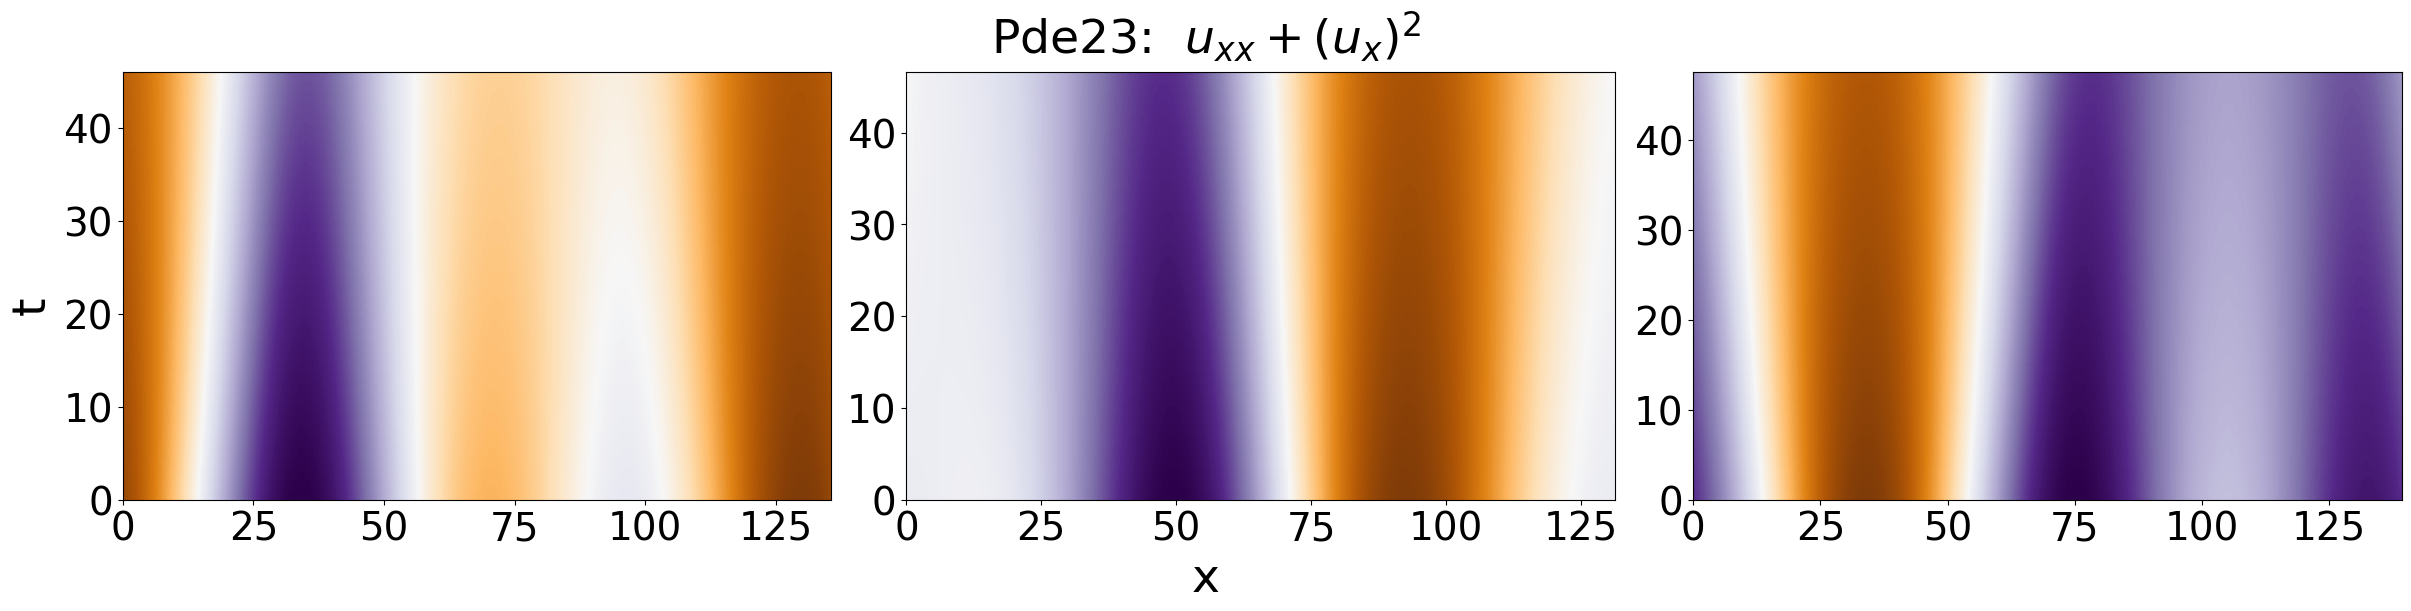

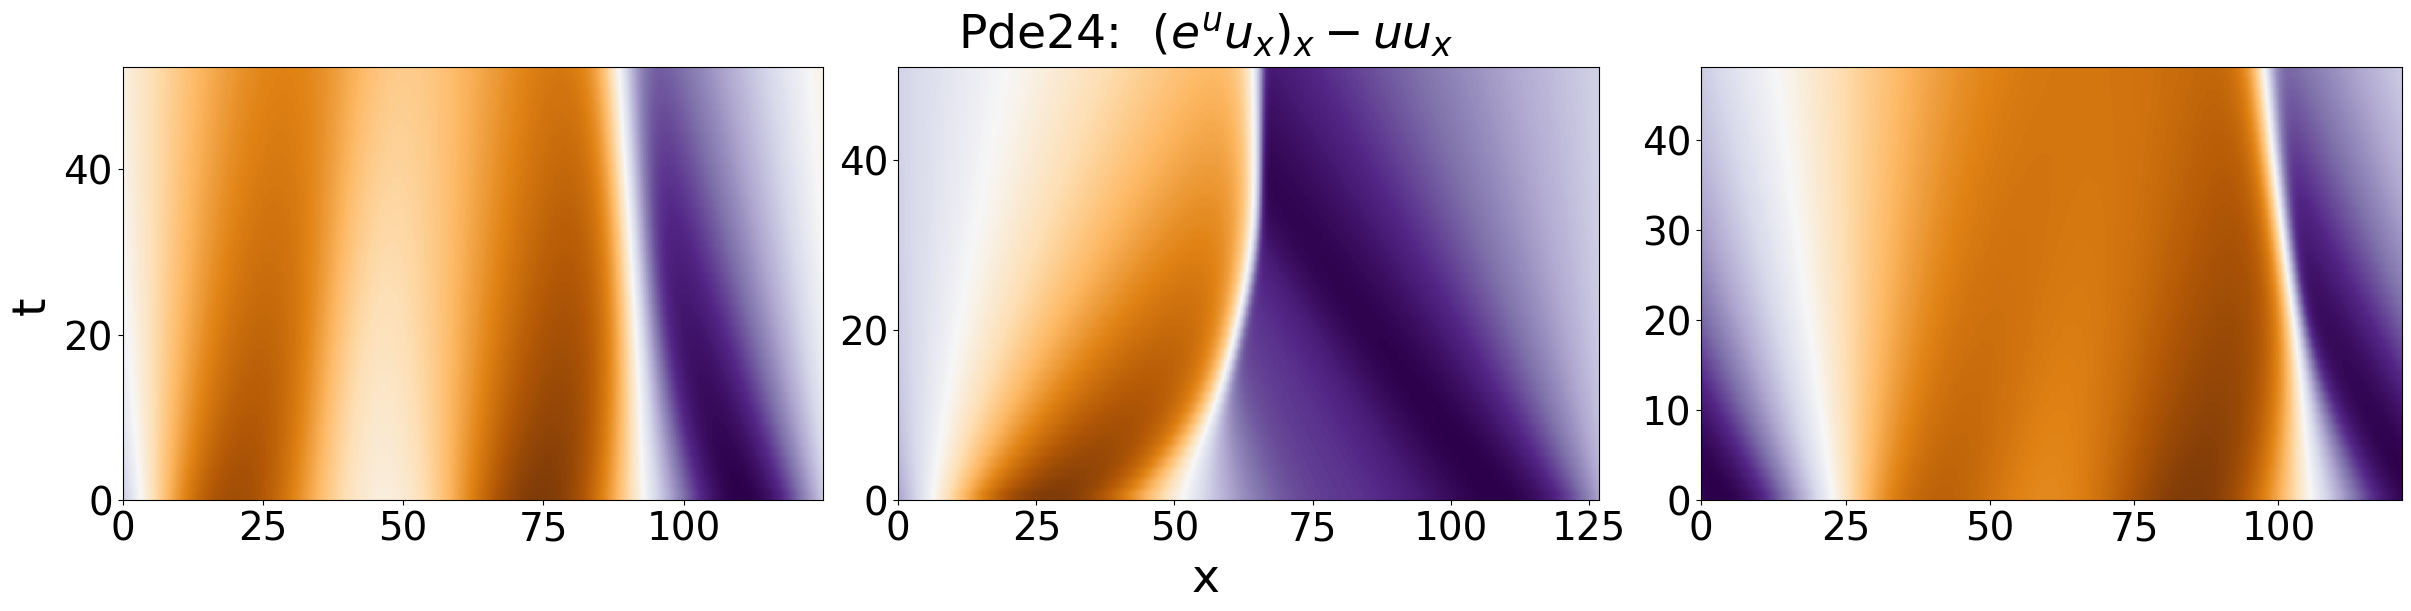

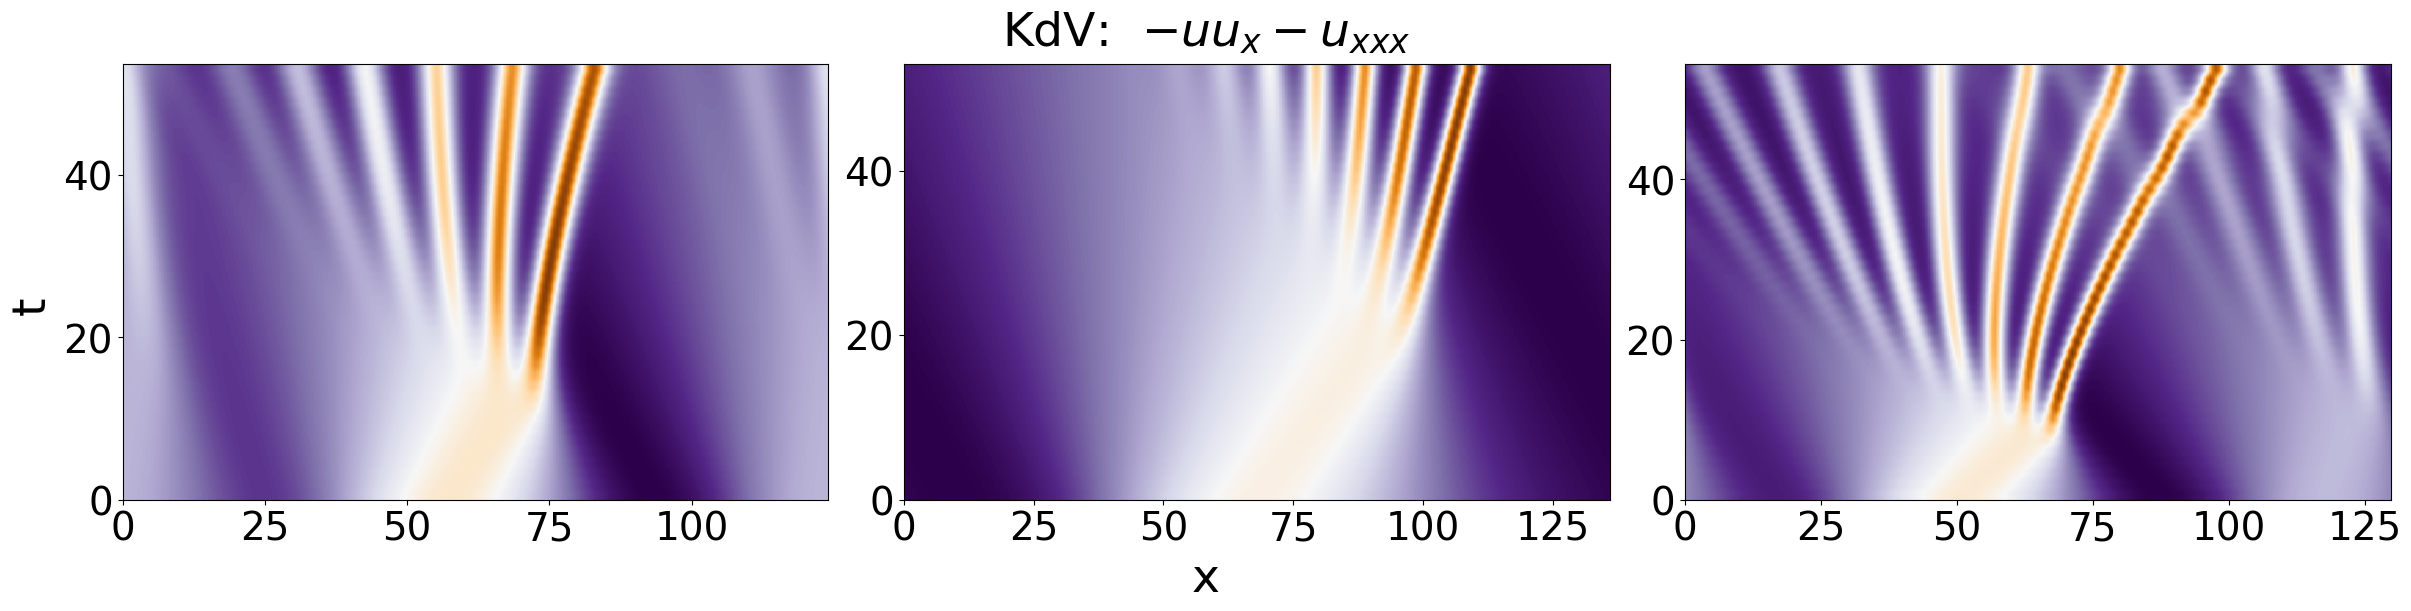

In [35]:
for pde_name, pde_str in pdes.items():
    us, dxs, dts = d = load_obj(os.path.join(args.data_dir, 'train', f'{pde_name}'))

    l = 3
    plot_1ds(us[:l], dxs[:l], dts[:l], nrows = 1, ncols = 3, title = rf'{pde_name}:  {pde_str}', figsize = (8,6))